In [54]:
import fiona
import geopandas as gp
import networkx as nx
import osmnx as ox
from matplotlib import colormaps, colors
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
denver_gdf = ox.geocode_to_gdf("Denver, CO")

In [3]:
parcels = gp.read_file("./data/parcels.shp")

<AxesSubplot:>

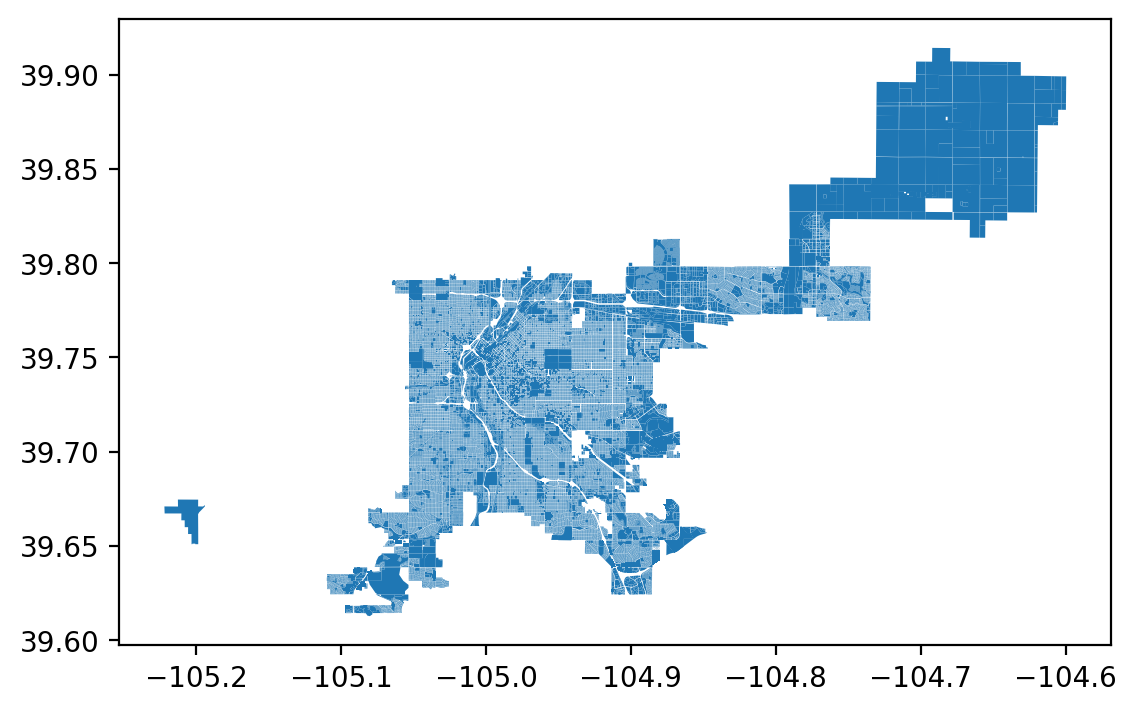

In [4]:
parcels.plot()

In [5]:
parcels.columns.values

array(['SCHEDNUM', 'MAPNUM', 'BLKNUM', 'PARCELNUM', 'APPENDAGE',
       'PARCEL_SOU', 'SYSTEM_STA', 'OWNER_NAME', 'OWNER_ADDR',
       'OWNER_AD_1', 'OWNER_CITY', 'OWNER_STAT', 'OWNER_ZIP',
       'SITUS_ADDR', 'SITUS_AD_1', 'SITUS_AD_2', 'SITUS_CITY',
       'SITUS_STAT', 'SITUS_ZIP', 'SITUS_AD_3', 'SITUS_AD_4',
       'SITUS_STR_', 'SITUS_STR1', 'SITUS_ST_1', 'SITUS_ST_2',
       'SITUS_ST_3', 'SITUS_ST_4', 'SITUS_ST_5', 'SITUS_UNIT',
       'SITUS_UN_1', 'TAX_DIST', 'SITUS_X_CO', 'SITUS_Y_CO', 'PROP_CLASS',
       'D_CLASS', 'D_CLASS_CN', 'DCL12', 'ZONE_ID', 'ZONE_10',
       'APPRAISED_', 'APPRAISED1', 'APPRAISE_1', 'ASSESSED_L',
       'ASSESSED_I', 'ASSESSED_T', 'EXEMPT_AMT', 'TAXABLE_AM',
       'LAND_AREA', 'RES_ORIG_Y', 'RES_ABOVE_', 'COM_ORIG_Y',
       'COM_GROSS_', 'COM_NET_AR', 'COM_STRUCT', 'LEGAL_DESC',
       'TOT_UNITS', 'RECEPTION_', 'ASAL_INSTR', 'SALE_DATE', 'SALE_MONTH',
       'SALE_YEAR', 'SALE_PRICE', 'geometry'], dtype=object)

In [58]:
pd.set_option('display.max_columns', None)
parcels[parcels["SCHEDNUM"] == "0527215027000"].T.to_dict()

{153290: {'SCHEDNUM': '0527215027000',
  'MAPNUM': '05272',
  'BLKNUM': '15',
  'PARCELNUM': '027',
  'APPENDAGE': '000',
  'PARCEL_SOU': 'Sanborn',
  'SYSTEM_STA': '2010-12-09',
  'OWNER_NAME': 'SCHMIDT,KATHRYN',
  'OWNER_ADDR': '2163 S BANNOCK ST',
  'OWNER_AD_1': nan,
  'OWNER_CITY': 'DENVER',
  'OWNER_STAT': 'CO',
  'OWNER_ZIP': '80223-4127',
  'SITUS_ADDR': 114679.0,
  'SITUS_AD_1': '2163 S BANNOCK ST',
  'SITUS_AD_2': nan,
  'SITUS_CITY': 'DENVER',
  'SITUS_STAT': 'CO',
  'SITUS_ZIP': '80223-4127',
  'SITUS_AD_3': '2163',
  'SITUS_AD_4': nan,
  'SITUS_STR_': nan,
  'SITUS_STR1': 'S',
  'SITUS_ST_1': nan,
  'SITUS_ST_2': 'BANNOCK',
  'SITUS_ST_3': 'ST',
  'SITUS_ST_4': nan,
  'SITUS_ST_5': nan,
  'SITUS_UNIT': nan,
  'SITUS_UN_1': nan,
  'TAX_DIST': 'DENV',
  'SITUS_X_CO': 3143475.0,
  'SITUS_Y_CO': 1671995.0,
  'PROP_CLASS': '1212',
  'D_CLASS': '117',
  'D_CLASS_CN': 'SFR Grade C, D, or E, w/RK',
  'DCL12': '11',
  'ZONE_ID': 'URH',
  'ZONE_10': 'U-RH-2.5',
  'APPRAISED_': 27460

In [6]:
parcels.head()

,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOU,SYSTEM_STA,OWNER_NAME,OWNER_ADDR,OWNER_AD_1,...,COM_STRUCT,LEGAL_DESC,TOT_UNITS,RECEPTION_,ASAL_INSTR,SALE_DATE,SALE_MONTH,SALE_YEAR,SALE_PRICE,geometry
0,0523312004000,05233,12,004,000,Sanborn,2010-12-09,"RIDGE,MICHAEL J",1624 S MARION ST,NaN,...,NaN,L 7 & 8 BLK 43 STEBBINS HTS,1,0000099568,QC: QUIT CLAIM,1987-03-04,0304,1987.0,0.0,"POLYGON Z ((-104.97215 39.68691 0.00000, -104...."
1,0524204023000,05242,04,023,000,Sanborn,2010-12-09,"WINN,JOAN",1109 S FILLMORE ST,NaN,...,NaN,ALTA VISTA B4 L45 & 46,1,2009083875,WD: WARRANTY,2009-06-18,0618,2009.0,580000.0,"POLYGON Z ((-104.95405 39.69622 0.00000, -104...."
2,0634418001000,06344,18,001,000,Sanborn,2010-12-09,"DIVEL,SHANDA",3284 S ELMIRA CT,NaN,...,NaN,LOT 1 BLK 25 HAMPDEN HTS 3RD FLG,1,2014058223,WD: WARRANTY,2014-05-16,0516,2014.0,0.0,"POLYGON Z ((-104.87333 39.65813 0.00000, -104...."
3,0225112019000,02251,12,019,000,Sanborn,2010-12-09,"POLLARD,REJI",3600 N ADAMS ST,NaN,...,NaN,L 4 & 5 BLK 23 J COOK JRS NORTH DIVISION OF CA...,1,2021078803,QC: QUIT CLAIM,2021-04-23,0423,2021.0,0.0,"POLYGON Z ((-104.94859 39.76723 0.00000, -104...."
4,0609303015000,06093,03,015,000,NaN,2019-10-08,"KAGAN,LAURIE L",26 ROSEMARY ST,NaN,...,NaN,LOWRY FILING NO 4 B3 L14,1,0000238998,WD: WARRANTY,2002-12-11,1211,2002.0,282000.0,"POLYGON Z ((-104.89921 39.71652 0.00000, -104...."


In [7]:
parcels["PROP_CLASS"].unique()

array(['1212', '1215', '1230', '9149', '2235', '2220', '9198', '0300',
       '9259', '9139', '0200', '0101', nan, '9239', '2230', '0510',
       '9230', '2245', '1220', '9129', '2212', '9298', '0100', '9199',
       '1225', '9169', '9270', '2225', '9229', '9120', '8991', '9237',
       '9250', '9279', '9249', '1112', '2215', '3215', '1250', '1130',
       '9219', '9260', '2130', '9137', '2250', '9269', '4127', '2120',
       '9190', '9130', '8992', '2020', '9228', '9299', '9179', '1115',
       '9159', '9290', '0520', '9240', '1125', '0530', '9221', '2125',
       '2112', '9232', '1120', '0550', '9247', '9140', '9224', '2135',
       '1140', '0540', '2140', '9220', '9131', '9170', '2021', '1240',
       '9128', '2145', '2150', '3115', '9160', '2023', '9119', '9233',
       '9147', '0010', '9289'], dtype=object)

In [8]:
parcels[parcels["OWNER_NAME"].str.lower().str.contains("water").fillna(False).astype(bool)].head(50)

,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOU,SYSTEM_STA,OWNER_NAME,OWNER_ADDR,OWNER_AD_1,...,COM_STRUCT,LEGAL_DESC,TOT_UNITS,RECEPTION_,ASAL_INSTR,SALE_DATE,SALE_MONTH,SALE_YEAR,SALE_PRICE,geometry
1271,0131125004000,01311,25,004,000,Sanborn,2023-02-02,"WATERS,OLIVIA HUDSON",2065 EUDORA ST,NaN,...,NaN,MORES PARK HEIGHTS 01311 B9 L7 & N/2 OF L8 & S...,1,2022123343,WD: WARRANTY,2022-09-19,0919,2022.0,1225000.0,"POLYGON Z ((-104.93062 39.74874 0.00000, -104...."
1447,0230131032000,02301,31,032,000,Sanborn,2010-12-08,FISHWATER PROPERTIES LLC,3801 W 32ND AVE,NaN,...,321: RESTAURANT-FULL SVC,THE S 50FT OF L 24 & 25 & OF THE E 16FT OF L 2...,0,2016106694,WD: WARRANTY,2016-08-10,0810,2016.0,850000.0,"POLYGON Z ((-105.03726 39.76220 0.00000, -105...."
2143,0517326127000,05173,26,127,000,NaN,2010-12-09,BOARD OF WATER COMMISSIONERS CITY & COUNTY OF ...,1600 W 12TH AVE,NaN,...,NaN,PLOT 26 & 27 EXC E 147FT OF SD PLOTS WESTWOOD ...,0,NaN,NaN,NaN,NaN,0.0,0.0,"POLYGON Z ((-105.03037 39.69698 0.00000, -105...."
2653,0234527146146,02345,27,146,146,NaN,2010-12-09,BAYSWATER MANAGEMENT COMPANY LP,730 17TH ST STE 500,NaN,...,355: OFFICE CONDOMINIUM,EQUITABLE BUILDING CONDOS U-5L,0,2017020252,WD: WARRANTY,2017-02-14,0214,2017.0,2260000.0,"POLYGON Z ((-104.99217 39.74638 0.00000, -104...."
6557,0631424022000,06314,24,022,000,NaN,2010-12-09,"WATERMAN,SARAH",3313 S HOLLY ST,NaN,...,NaN,L 36 BLK 56 UNIVERSITY HILLS NO 3 FLG NO 3,1,2020108186,WD: WARRANTY,2020-07-23,0723,2020.0,444000.0,"POLYGON Z ((-104.92306 39.65592 0.00000, -104...."
7354,0505319001000,05053,19,001,000,Sanborn,2010-12-09,BOARD OF WATER COMMISSIONERS CITY & COUNTY OF ...,1600 W 12TH AVE,NaN,...,NaN,L 1 & 2 BLK 22 VILLA PARK,0,NaN,NaN,NaN,NaN,0.0,0.0,"POLYGON Z ((-105.02815 39.73272 0.00000, -105...."
7938,0514216011000,05142,16,011,000,Sanborn,2010-12-09,"WATERS,VICKI L",1427 E VIRGINIA AVE,NaN,...,NaN,PLOT H BEING W 38 1/2FT OF E 147FT OF S 100FT ...,1,0000043415,SW: SPECIAL WARRANTY,1990-05-17,0517,1990.0,0.0,"POLYGON Z ((-104.97038 39.70756 0.00000, -104...."
8441,0234527101101,02345,27,101,101,NaN,2010-12-09,BAYSWATER MANAGEMENT COMPANY LP,730 17TH ST STE 500,NaN,...,355: OFFICE CONDOMINIUM,EQUITABLE BUILDING CONDOS U-5H,0,2017020252,WD: WARRANTY,2017-02-14,0214,2017.0,2260000.0,"POLYGON Z ((-104.99217 39.74638 0.00000, -104...."
8777,0632100006000,06321,00,006,000,Sanborn,2022-11-17,BOARD OF WATER COMMISSIONERS CITY & COUNTY OF ...,1600 W 12TH AVE,NaN,...,NaN,ROW OF HIGH LINE CANAL IN NW1/4 NE1/4 SW1/4 NE...,0,NaN,NaN,NaN,NaN,0.0,0.0,"POLYGON Z ((-104.90353 39.66065 0.00000, -104...."
8854,0521205012000,05212,05,012,000,NaN,2010-12-09,"BRIDGEWATER,CONSTANCE I",654 S TEJON ST,NaN,...,NaN,L 37 BLK 2 KING HOUSTON SUB,1,2005170703,QC: QUIT CLAIM,2005-10-05,1005,2005.0,0.0,"POLYGON Z ((-105.01216 39.69547 0.00000, -105...."


In [9]:
denver_parcels_mask = parcels["OWNER_NAME"].str.lower().str.contains("county of denver").fillna(False).astype(bool)
rtd_parcels_mask = parcels["OWNER_NAME"].str.upper().str.contains("REGIONAL TRANSPORTATION DISTRICT").fillna(False).astype(bool)
water_parcels_mask = parcels["OWNER_NAME"].str.upper().str.contains("BOARD OF WATER COMMISSIONERS CITY").fillna(False).astype(bool)

In [10]:
vacant_parcels_mask = (parcels["PROP_CLASS"].fillna(1000).astype(int) <= 600)

In [11]:
np.where(np.all([denver_parcels_mask, vacant_parcels_mask], axis=0))

(array([127669, 194408]),)

<AxesSubplot:>

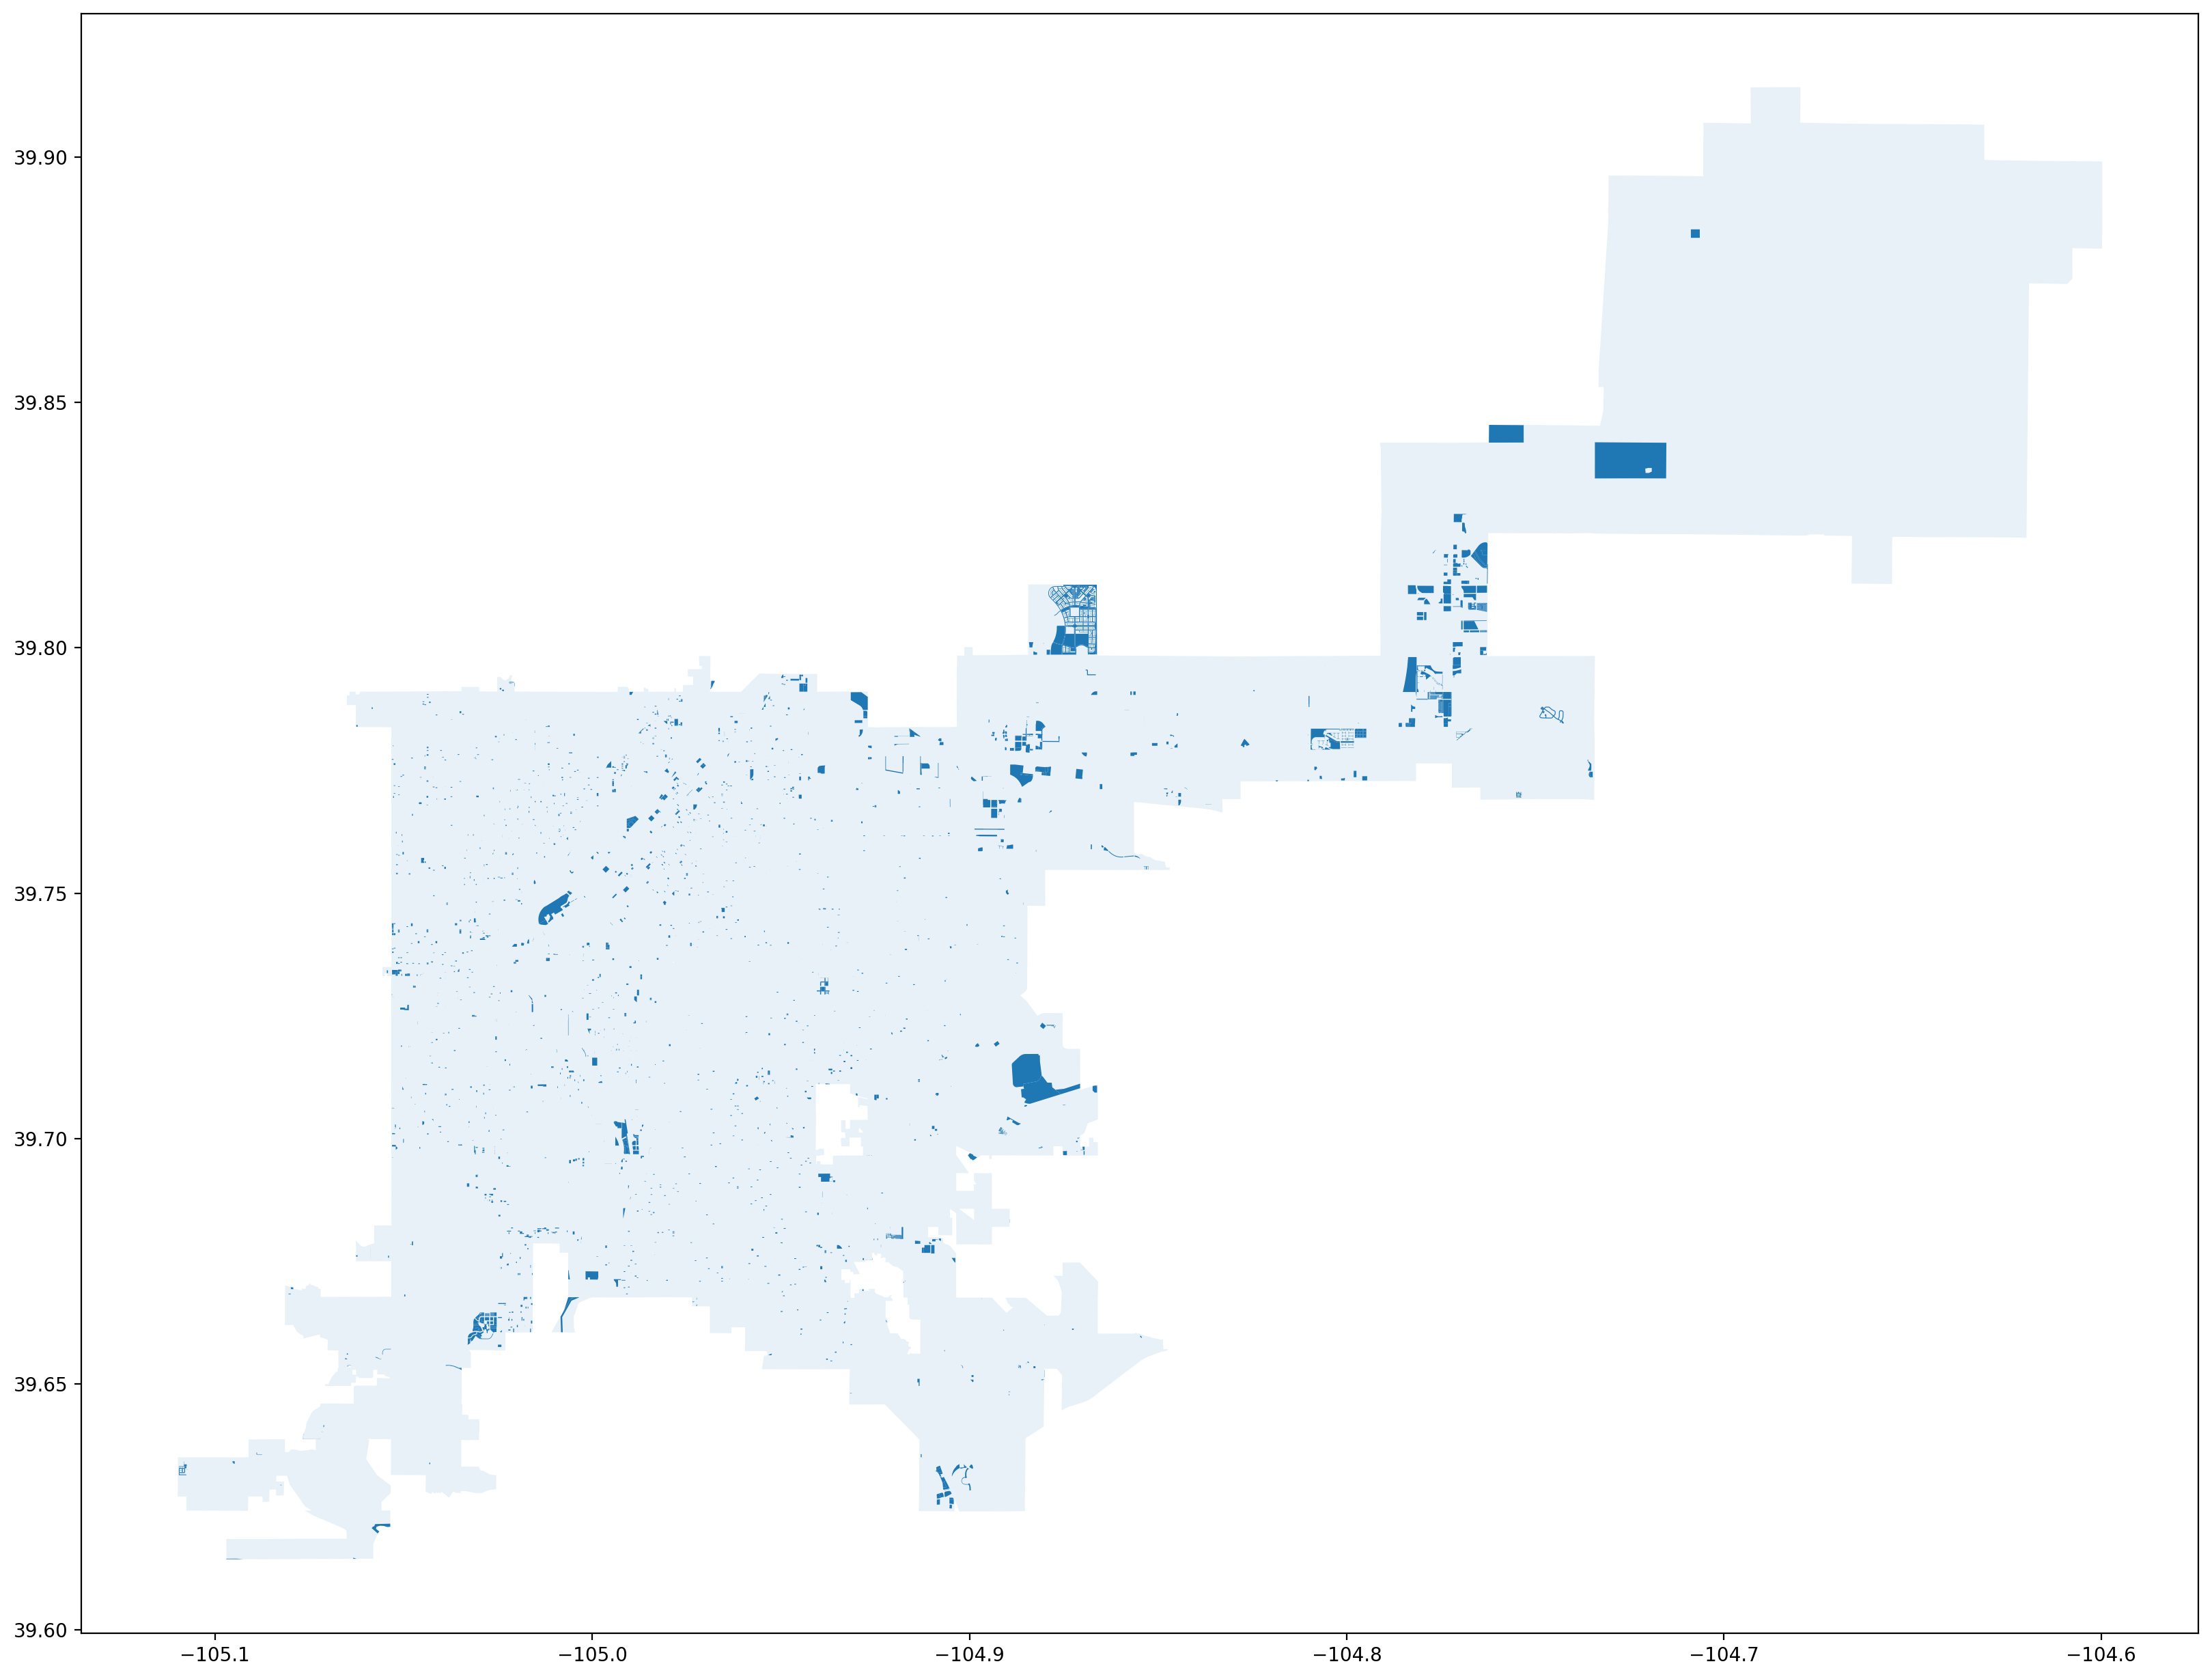

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))

#parcels[denver_parcels_mask].plot(ax=ax)
#parcels[rtd_parcels_mask].plot(ax=ax, facecolor="red")
#parcels[water_parcels_mask].plot(ax=ax, facecolor="green")
parcels[vacant_parcels_mask].plot(ax=ax)
denver_gdf.plot(ax=ax, alpha=0.1)

In [13]:
np.sum(parcels[vacant_parcels_mask].geometry.to_crs("ESRI:103245").area) / 4046.86

2186.176542970393

In [14]:
np.where(vacant_parcels_mask == True)[0].shape

(3615,)

In [15]:
(parcels[vacant_parcels_mask].geometry.to_crs("ESRI:103245").area / 4046.86).idxmax()

212289

In [16]:
dict(parcels.iloc[212289])

{'SCHEDNUM': '1136100006998',
 'MAPNUM': '11361',
 'BLKNUM': '00',
 'PARCELNUM': '006',
 'APPENDAGE': '998',
 'PARCEL_SOU': nan,
 'SYSTEM_STA': '2010-12-08',
 'OWNER_NAME': nan,
 'OWNER_ADDR': nan,
 'OWNER_AD_1': nan,
 'OWNER_CITY': nan,
 'OWNER_STAT': nan,
 'OWNER_ZIP': nan,
 'SITUS_ADDR': 0.0,
 'SITUS_AD_1': '7684 PENA BLVD',
 'SITUS_AD_2': nan,
 'SITUS_CITY': 'DENVER',
 'SITUS_STAT': 'CO',
 'SITUS_ZIP': '80249',
 'SITUS_AD_3': '7684',
 'SITUS_AD_4': nan,
 'SITUS_STR_': nan,
 'SITUS_STR1': nan,
 'SITUS_ST_1': nan,
 'SITUS_ST_2': 'PENA',
 'SITUS_ST_3': 'BLVD',
 'SITUS_ST_4': nan,
 'SITUS_ST_5': nan,
 'SITUS_UNIT': nan,
 'SITUS_UN_1': nan,
 'TAX_DIST': 'DENV',
 'SITUS_X_CO': 3219189.0,
 'SITUS_Y_CO': 1730381.0,
 'PROP_CLASS': '0010',
 'D_CLASS': '387',
 'D_CLASS_CN': 'AIRPORT P.I. OTHER',
 'DCL12': '38',
 'ZONE_ID': 'DIA',
 'ZONE_10': 'DIA',
 'APPRAISED_': 0,
 'APPRAISED1': 0,
 'APPRAISE_1': 0,
 'ASSESSED_L': 0,
 'ASSESSED_I': 0,
 'ASSESSED_T': 0,
 'EXEMPT_AMT': 0,
 'TAXABLE_AM': 0,
 '

<AxesSubplot:>

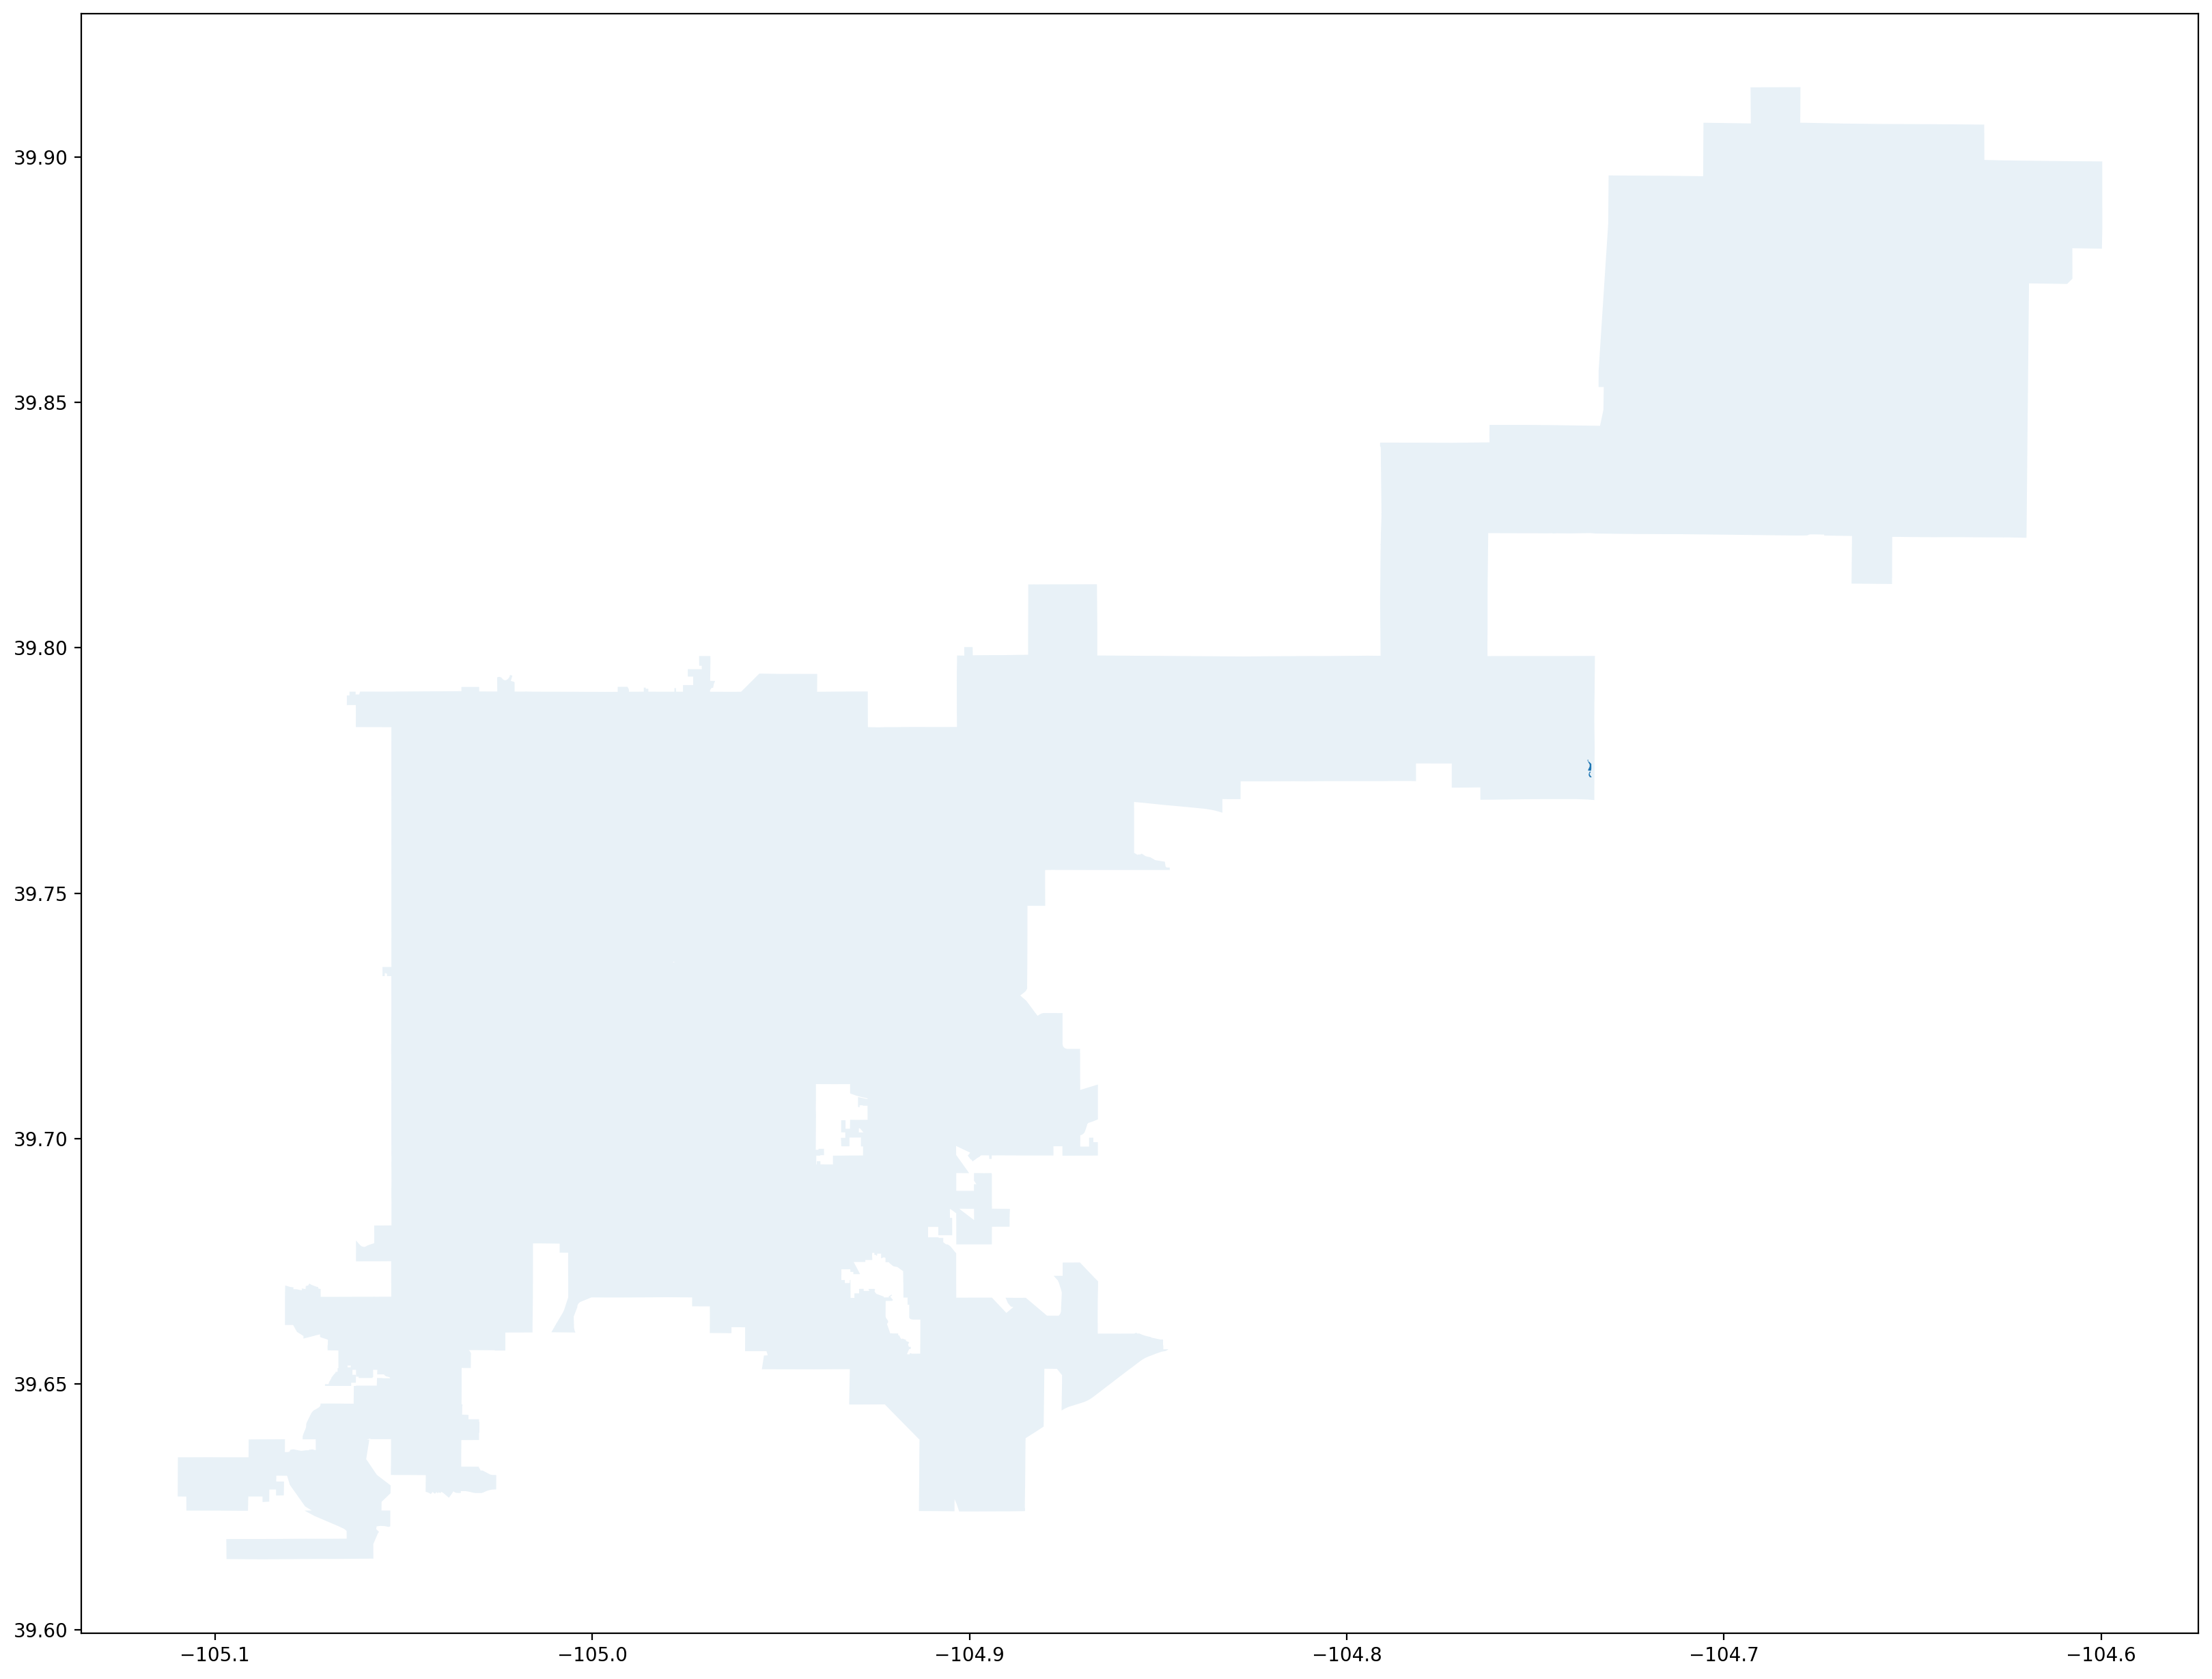

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
parcels[np.all([denver_parcels_mask, vacant_parcels_mask], axis=0)].plot(ax=ax)
denver_gdf.plot(ax=ax, alpha=0.1)

In [18]:
parcels[np.all([denver_parcels_mask, vacant_parcels_mask], axis=0)]

,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOU,SYSTEM_STA,OWNER_NAME,OWNER_ADDR,OWNER_AD_1,...,COM_STRUCT,LEGAL_DESC,TOT_UNITS,RECEPTION_,ASAL_INSTR,SALE_DATE,SALE_MONTH,SALE_YEAR,SALE_PRICE,geometry
127669,0023400039000,00234,00,039,000,NaN,2020-02-28,CITY AND COUNTY OF DENVER,201 W COLFAX AVE DEPT 401,NaN,...,NaN,T3 R66 S23 SE/4 DIF REC#21768 RCD 2/5/99 EXC ...,0,2022131882,SW: SPECIAL WARRANTY,2022-10-14,1014,2022.0,0.0,"POLYGON Z ((-104.73523 39.77496 0.00000, -104...."
194408,0023409060000,00234,09,060,000,NaN,2020-06-04,CITY AND COUNTY OF DENVER,201 W COLFAX AVE DEPT 401,NaN,...,NaN,GREEN VALLEY RANCH FLG 24 B1 PT TR-G COM E/4 C...,0,2022131882,SW: SPECIAL WARRANTY,2022-10-14,1014,2022.0,0.0,"POLYGON Z ((-104.73553 39.77476 0.00000, -104...."


In [19]:
parcels[vacant_parcels_mask].head(50)

,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOU,SYSTEM_STA,OWNER_NAME,OWNER_ADDR,OWNER_AD_1,...,COM_STRUCT,LEGAL_DESC,TOT_UNITS,RECEPTION_,ASAL_INSTR,SALE_DATE,SALE_MONTH,SALE_YEAR,SALE_PRICE,geometry
83,0505424021000,05054,24,021,000,NaN,2010-12-09,ABARCA FOUR LLC,2645 W 7TH AVE,NaN,...,NaN,L 21 TO 25 INC BLK 5 FISKS ADD TO S FAIRVIEW &...,0,2019076087,WD: WARRANTY,2019-06-14,0614,2019.0,0.0,"POLYGON Z ((-105.02117 39.72989 0.00000, -105...."
116,0132332041000,01323,32,041,000,NaN,2010-12-08,CERTIFIED INDEMNITY CO,6401 E COLFAX AVE,NaN,...,NaN,DOWNINGTON B48 REAR 8FT OF L13 TO 17 & REAR 8F...,0,NaN,NaN,NaN,NaN,0.0,0.0,"POLYGON Z ((-104.91343 39.74074 0.00000, -104...."
152,0230428017000,02304,28,017,000,NaN,2010-12-08,CBG HOMES LLC,2255 SHERIDAN BLVD STE C-212,NaN,...,NaN,L 33 & 34 BLK 7 MCGILLS SUB,0,2022000955,WD: WARRANTY,2021-12-29,1229,2021.0,525000.0,"POLYGON Z ((-105.03940 39.75554 0.00000, -105...."
207,0215421017000,02154,21,017,000,NaN,2011-07-06,"KOWALCZYK,ANDREW A",4868 GRANT ST,NaN,...,NaN,PLATTE FARM B10 PT L6 BEG SW COR L6 TH N 7.5FT...,0,2011066094,QC: QUIT CLAIM,2011-06-02,0602,2011.0,0.0,"POLYGON Z ((-104.98300 39.78512 0.00000, -104...."
238,0806100010000,08061,00,010,000,NaN,2010-12-09,CHRISTIAN BROTHERS OF J K MULLEN HIGH SCHOOL INC,3601 S LOWELL BLVD,NaN,...,NaN,T5 R68 S6 NE/4 BEG NE COR NE/4 TH W 104.68FT S...,0,NaN,NaN,NaN,NaN,0.0,0.0,"POLYGON Z ((-105.03500 39.65330 0.00000, -105...."
310,0110400067000,01104,00,067,000,NaN,2018-11-06,FC STAPLETON II LLC,7351 E 29TH AVE,NaN,...,NaN,STAPLETON FLG 52 TR-C,0,NaN,NaN,NaN,NaN,0.0,0.0,"POLYGON Z ((-104.86839 39.80018 0.00000, -104...."
473,0016132099000,00161,32,099,000,NaN,2022-08-06,CLAYTON PROPERTIES GROUP II INC,10 inverness Dr Ste 250,NaN,...,NaN,TOWER 160 SUB FLG 4 B4 PT L1 & 2 BEG NW COR L1...,0,2022099955,PS: PARCEL SPLIT,2022-07-20,0720,2022.0,0.0,"POLYGON Z ((-104.77496 39.78879 0.00000, -104...."
531,0532224001000,05322,24,001,000,NaN,2021-10-04,THB LORETTO LAND LLC,1875 LAWRENCE ST STE 900,NaN,...,NaN,LORETTO HEIGHTS FLG 1 B9 L1,0,2021188089,SW: SPECIAL WARRANTY,2021-10-05,1005,2021.0,14480000.0,"POLYGON Z ((-105.03040 39.66224 0.00000, -105...."
543,0226323023000,02263,23,023,000,Sanborn,2010-12-09,"HOWARD,MARY E",3103 STOUT ST,NaN,...,NaN,N 10FT OF REAR 25FT OF L 20 BLK 63 CASE & EBER...,0,2014102569,QC: QUIT CLAIM,2014-08-22,0822,2014.0,3000.0,"POLYGON Z ((-104.97498 39.76038 0.00000, -104...."
545,0003106006000,00031,06,006,000,NaN,2021-03-17,ACM HIGH POINT VI B LLC,4100 E MISSISSIPPI AVE STE 500,NaN,...,NaN,HIGH POINT SUBD BLK 3 PTN L1 DAF COM AT N MOS...,0,2020221048,SW: SPECIAL WARRANTY,2020-12-31,1231,2020.0,0.0,"POLYGON Z ((-104.77182 39.81531 0.00000, -104...."


In [26]:
parcels[parcels["DCL12"].astype("int") < 10]["PROP_CLASS"]

12        9149
35        9149
83        0300
115       9139
116       0200
          ... 
238073    0300
238082    9129
238090    9149
238095    9139
238100    9139
Name: PROP_CLASS, Length: 9717, dtype: object

In [32]:
parcels[parcels["DCL12"].astype("int") < 10]["ASSESSED_T"].values

array([    30,     30, 152250, ...,     30,     30,     30])

/var/folders/0_/t8n56nmx19sbvj35c9jk7stm0000gn/T/ipykernel_3393/1166492585.py:1: RuntimeWarning: divide by zero encountered in log
  sns.displot(np.log(parcels[parcels["DCL12"].astype("int") < 10]["ASSESSED_T"].values))


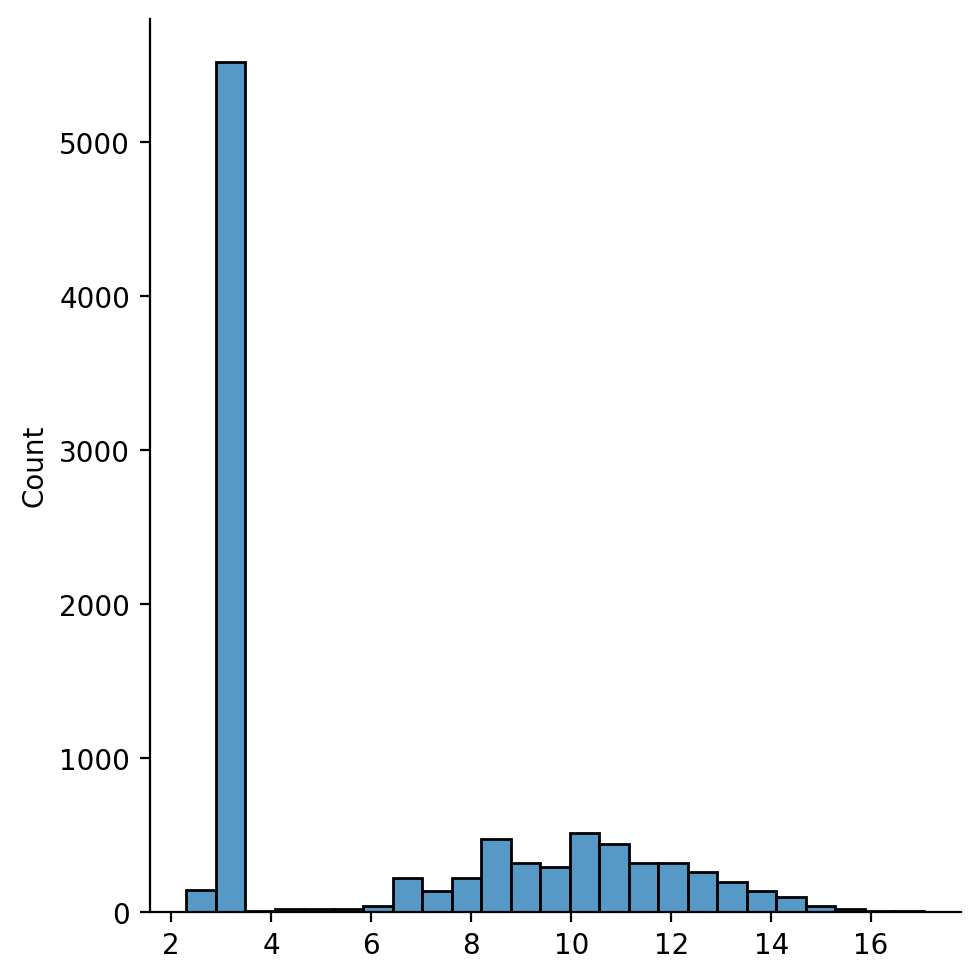

In [35]:
sns.displot(np.log(parcels[parcels["DCL12"].astype("int") < 10]["ASSESSED_T"].values))

<AxesSubplot:>

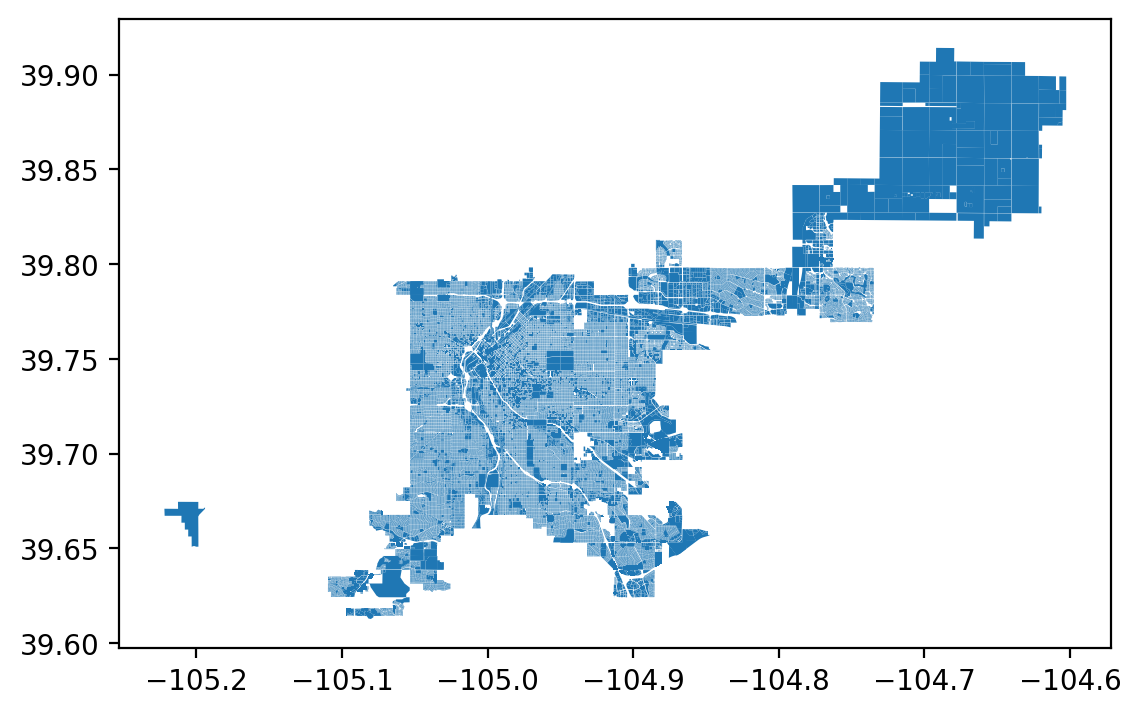

In [42]:
parcels[parcels["ASSESSED_T"] > 30].plot()

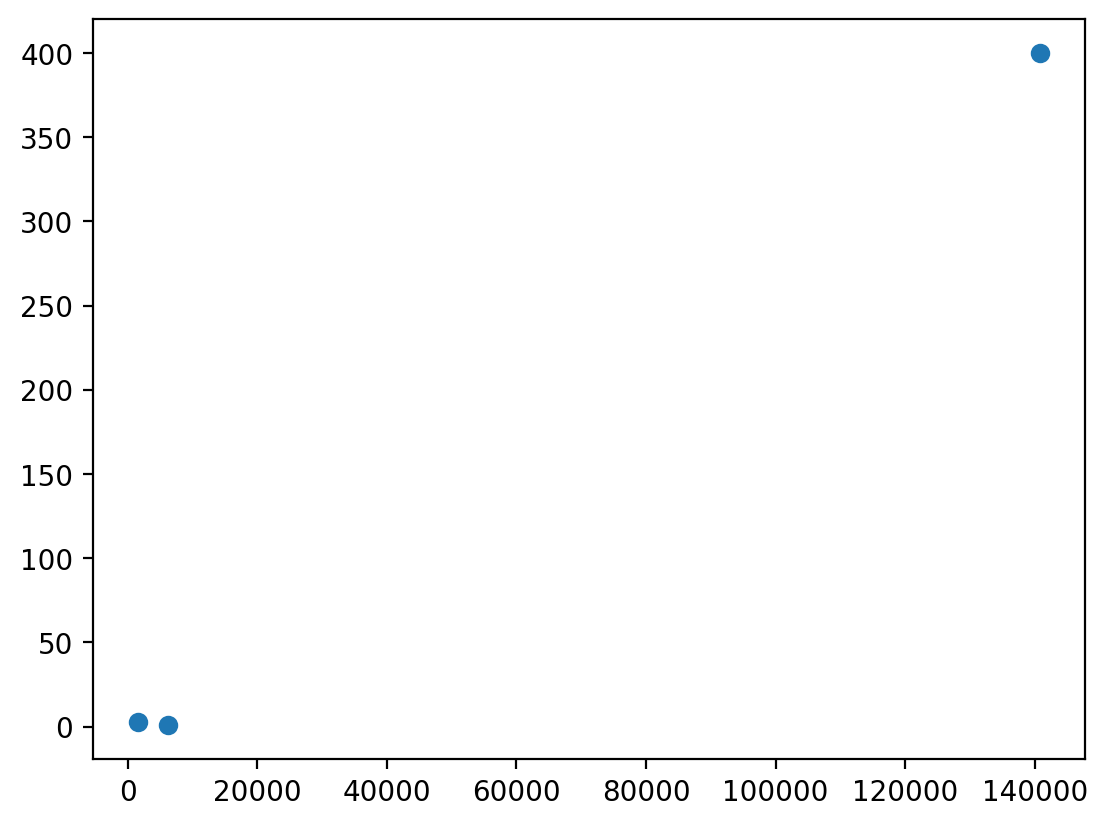

In [44]:
plt.scatter([6300, 140753, 4685/3], [1, 400, 3])

In [59]:
import sys

In [60]:
sys.version

'3.10.10 (main, Feb 16 2023, 02:55:02) [Clang 14.0.0 (clang-1400.0.29.202)]'

###